In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data-lab-4-heart.csv')
df = data.copy()
print(df.head(5))
print(df.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
(303, 14)


Here are the descriptions of each column.
*   **age** age
*   **sex** sex
*   **cp**  chest pain type (4 values)
*   **trestbps** resting blood pressure
*   **chol**    serum cholestoral in mg/dl
*   **fbs**     fasting blood sugar > 120 mg/dl
*   **restecg** resting electrocardiographic results (values 0,1,2)
*   **thalach**  maximum heart rate achieved
*   **exang**   exercise induced angina
*   **oldpeak** ST depression induced by exercise relative to rest
*   **slope**   the slope of the peak exercise ST segment
*   **ca**      number of major vessels (0-3) colored by flourosopy
*   **thal**    3 = normal; 6 = fixed defect; 7 = reversable defect
*   **target**  

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.drop_duplicates(inplace=True)
# row indexs doesn't change after dropping (so still the last index is 302 (not 301 [indexs start from 0]))

# check data volume
df.shape
# not enough?: it should be at least 650 (13 * 50)

(302, 14)

<Axes: >

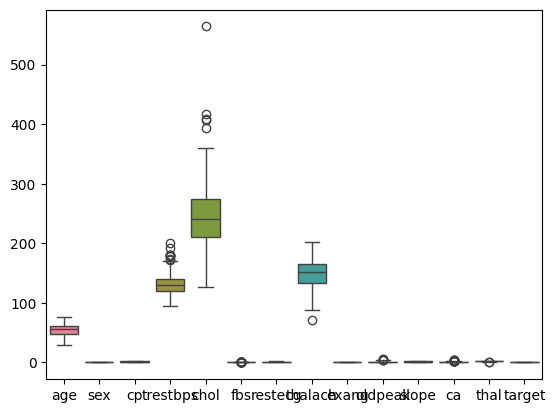

In [5]:
# define outliers
sns.boxplot(data=df)

In [6]:
# define outliers
for column in df.columns:
    Q1 = df[column].quantile(.25)
    Q3 = df[column].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    l = [i for i in df[column] if i < lower_bound or i > upper_bound]
    print(f'{column}: {len(l)}, {l}')

# no actin needed:
# outliers for trestbps adn chol are indeed normal numbers so no need to do anything
# and outliers in categoricals don't matter

age: 0, []
sex: 0, []
cp: 0, []
trestbps: 9, [172, 178, 180, 180, 200, 174, 192, 178, 180]
chol: 5, [417, 564, 394, 407, 409]
fbs: 45, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
restecg: 0, []
thalach: 1, [71]
exang: 0, []
oldpeak: 5, [4.2, 6.2, 5.6, 4.2, 4.4]
slope: 0, []
ca: 24, [3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3]
thal: 2, [0, 0]
target: 0, []


In [7]:
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe(percentiles=[.05, .25, .5, .75, .95])

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
5%,40.00000,108.000000,175.050000,108.050000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
95%,68.00000,160.000000,326.950000,181.950000,3.400000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [8]:
# check correlation
corr = df.corr()['target'].sort_values()
corr

exang      -0.435601
oldpeak    -0.429146
ca         -0.408992
thal       -0.343101
sex        -0.283609
age        -0.221476
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
slope       0.343940
thalach     0.419955
cp          0.432080
target      1.000000
Name: target, dtype: float64

<Axes: >

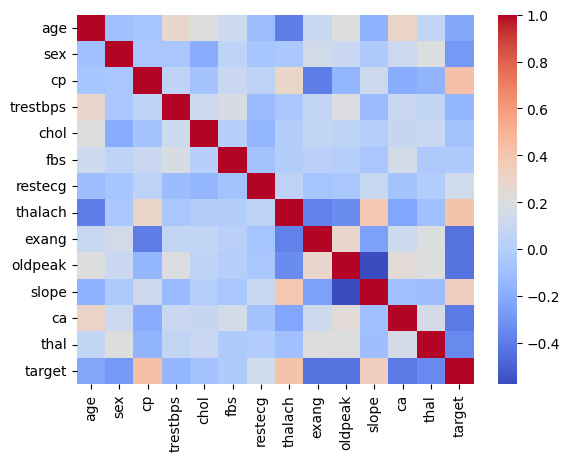

In [9]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [10]:
# preprocess x and y
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

features = df.drop(['target'], axis=1)

full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), ['age','trestbps','chol','thalach','oldpeak']),  # The "num" and "cat" in this code aren't previously defined variables - they're actually just labels or names you're giving to each part of your ColumnTransformer pipeline.
    ("cat", OrdinalEncoder(), ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
])

x = pd.DataFrame(full_pipeline.fit_transform(features))
y = df["target"]

x.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,0.0,0.0,0.0,1.0,1.0,2.0,0.0,2.0


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

logReg_model = LogisticRegression().fit(x_train, y_train)
y_pred = logReg_model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Accuracy: 0.824


<Axes: xlabel='Pred y', ylabel='True y'>

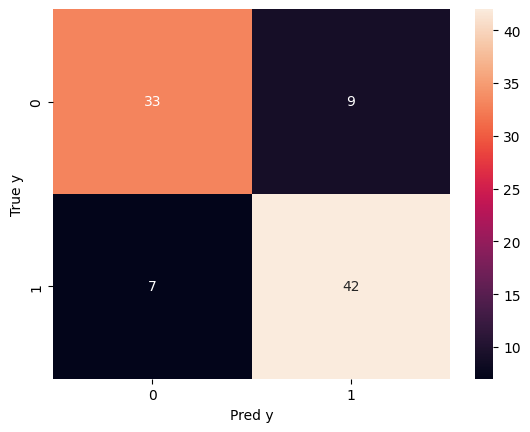

In [13]:
# draw confusion matrix (the TP, TN, FP, FN crosstab)
confMatrix_df = pd.DataFrame({
    'True y': y_test,
    'Pred y': y_pred
})

confMatrix = pd.crosstab(confMatrix_df['True y'], confMatrix_df['Pred y'])
sns.heatmap(confMatrix, annot=True)

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
Ky_pred = knn_model.predict(x_test)
round(accuracy_score(y_test, Ky_pred), 3)

0.846

<Axes: xlabel='Pred y', ylabel='True y'>

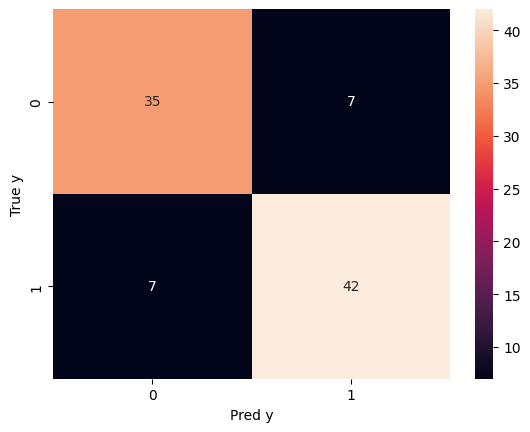

In [15]:
# confusion matrix
knnConf_df = pd.DataFrame({
    'True y': y_test,
    'Pred y': Ky_pred
})

conf_df = pd.crosstab(knnConf_df['True y'], knnConf_df['Pred y'])
sns.heatmap(conf_df, annot=True)

Best kay is 3, with accuracy of 0.846


<Axes: >

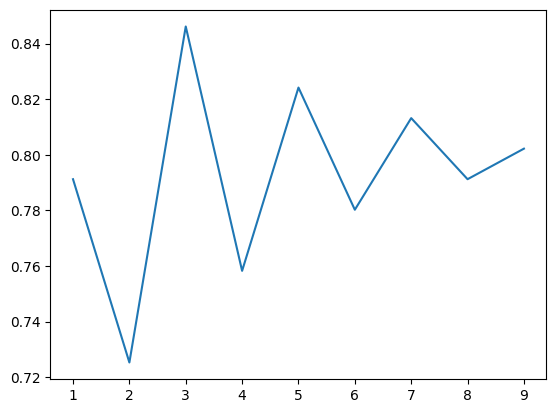

In [27]:
# Model tuning by finding optimal number of neighbors (K)
import numpy as np

accuracy = []
for K in range(1, 10):  # check 1-9
    model = KNeighborsClassifier(n_neighbors=K).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)


K_of_maxAccuracy = 1 + np.argmax(accuracy)  # +1 for the index0
print(f"Best kay is {K_of_maxAccuracy}, with accuracy of {np.max(accuracy):.3f}")

sns.lineplot(x=range(1, 10), y=accuracy)